### Moments
Image moments help you to calculate some features like center of mass of the object, area of the object etc

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("y.png")
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[0] ##boundary points of object

moments = cv2.moments(cnt)

print(moments) ##returns dictionary of moments
print(moments['m20']) ## so now we can get area of each moment

{'m00': 4634.0, 'm10': 668350.3333333333, 'm01': 493282.5, 'm20': 101878169.33333333, 'm11': 72186496.08333333, 'm02': 70099852.16666666, 'm30': 16199711611.1, 'm21': 10829550329.816666, 'm12': 10368342608.783333, 'm03': 11708769383.45, 'mu20': 5483657.450127095, 'mu11': 1041583.8471443057, 'mu02': 17590653.891688235, 'mu30': -75712860.77734566, 'mu21': -315681411.0199832, 'mu12': 36264548.712776184, 'mu03': 501744397.896019, 'nu20': 0.2553631687671845, 'nu11': 0.04850451622161774, 'nu02': 0.8191622396771342, 'nu30': -0.05179401550799261, 'nu21': -0.21595284777360135, 'nu12': 0.02480802573216059, 'nu03': 0.3432357047252216}
101878169.33333333


In [6]:
### contour area:
area = cv2.contourArea(cnt)

### contour perimeter:
perimeter = cv2.arcLength(cnt, True)

### Contour Approximation

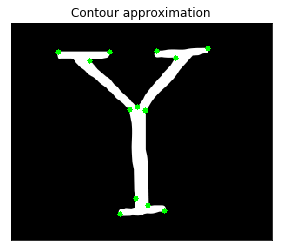

In [12]:
## epsilon = 10% of arc length, the smaller 1%, the more precise is approximation
## Third argument specifies whether curve is closed or not.
epsilon = 0.01*cv2.arcLength(cnt,True) 
approx = cv2.approxPolyDP(cnt,epsilon,True) 
imgappr = cv2.drawContours(img,approx,-1,(0,255,0),5)

plt.imshow(imgappr),plt.title('Contour approximation')
plt.xticks([]), plt.yticks([])
plt.show()

### Convex Hull Approximation

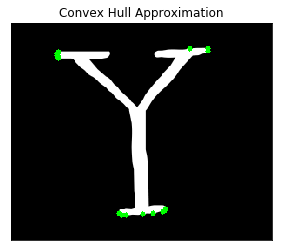

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("y.png")
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[0]

hull = cv2.convexHull(cnt)

chull = cv2.drawContours(img,hull,-1,(0,255,0),5)

plt.imshow(chull),plt.title('Convex Hull Approximation')
plt.xticks([]), plt.yticks([])
plt.show()

In [14]:
## to check if contour is convex:
k = cv2.isContourConvex(cnt)
print(k)

False


### Bounding Rectangle

#### Upright bounding rectangle which covers the full object. It doesn't consider the rotation of the object.


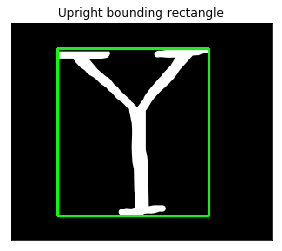

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("y.png")
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[0]

x,y,w,h = cv2.boundingRect(cnt)
rect = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

plt.imshow(rect),plt.title('Upright bounding rectangle')
plt.xticks([]), plt.yticks([])
plt.show()

#### Rotated rectangle

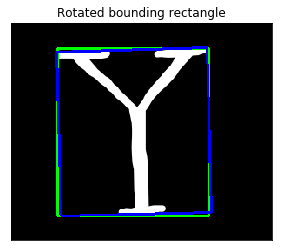

In [25]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
rect2 = cv2.drawContours(img,[box],0,(0,0,255),2)

plt.imshow(rect2),plt.title('Rotated bounding rectangle')
plt.xticks([]), plt.yticks([])
plt.show()

### Minimum Enclosing Circle

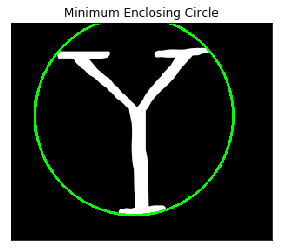

In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("y.png")
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[0]

(x,y), radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
circle = cv2.circle(img,center,radius,(0,255,0),2)

plt.imshow(circle),plt.title('Minimum Enclosing Circle')
plt.xticks([]), plt.yticks([])
plt.show()

### Fitting an Ellipse

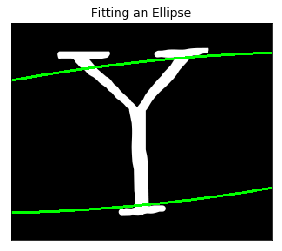

In [29]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("y.png")
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[0]

ellipse = cv2.fitEllipse(cnt)
im = cv2.ellipse(img,ellipse,(0,255,0),2)

plt.imshow(im),plt.title('Fitting an Ellipse')
plt.xticks([]), plt.yticks([])
plt.show()

### Fitting a Line

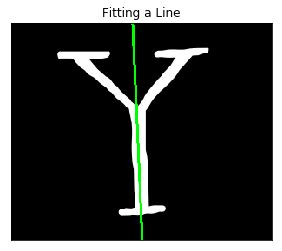

In [34]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("y.png")
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[0]

rows,cols = img.shape[:2]
[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
im = cv2.line(img,(cols-1,righty),(0,lefty),(0,255,0),2)

plt.imshow(im),plt.title('Fitting a Line')
plt.xticks([]), plt.yticks([])
plt.show()